## Validation Metrics


1. Introduction to Validation Metrics:
Validation metrics are used to evaluate the performance of machine learning models. In imbalanced datasets, where one class significantly outnumbers the other(s), traditional metrics like accuracy may not be informative. Therefore, specialized metrics are necessary to assess a model's performance in such scenarios.

2. Handling Imbalanced Datasets:
Before diving into metrics, let's briefly discuss techniques for handling imbalanced datasets:

  *   Resampling: You can oversample the minority class, undersample the majority class, or use synthetic data generation techniques like SMOTE (Synthetic Minority Over-sampling Technique).
  *   Different Algorithms: Some algorithms, like ensemble methods (Random Forest, Gradient Boosting), handle imbalanced data better.
  * Cost-Sensitive Learning: Modify the algorithm's cost function to penalize misclassifying the minority class more.

3. Common Validation Metrics for Imbalanced Datasets:
Here are some common validation metrics for imbalanced datasets:

  * Accuracy:
Accuracy is the ratio of correctly predicted instances to the total instances in the dataset. It's not suitable for imbalanced datasets.

  * Precision:
Precision measures the percentage of true positives (correctly predicted positive instances) among all predicted positives.

  * Recall:
Recall calculates the percentage of true positives among all actual positive instances.

  * F1-Score:
The F1-Score is the harmonic mean of precision and recall and is especially useful when you want to balance precision and recall.

  * Area Under the Receiver Operating Characteristic (ROC-AUC):
ROC-AUC measures the area under the Receiver Operating Characteristic curve and helps evaluate the model's ability to distinguish between classes.

  * Area Under the Precision-Recall Curve (PR AUC):
PR AUC calculates the area under the Precision-Recall curve and is useful when you care more about the minority class's performance.

4. Implementation and Example:
Let's implement these metrics using Python and scikit-learn on an imbalanced dataset. We'll use the famous "Breast Cancer" dataset from scikit-learn:


## Importing Libraries

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

C:\Users\night\AppData\Local\Temp\ipykernel_16500\1565821908.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score

## Importing Dataset

In [4]:
# Import breast cancer dataset for demo task
from sklearn.datasets import load_breast_cancer

In [5]:
# Import the load_digits dataset from sklearn.datasets
from sklearn.datasets import load_digits

## Analysing Dataset

### Loading and Analysing Breast Cancer Dataset

The dataset includes a total of 569 instances with 30 feature variables.

In [6]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Print the attributes and methods of the data object
print(dir(data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [7]:
# Extract the data -> It will be your X
X = data.data

# Extract the target -> It will be your y
y = data.target

In [8]:
# Create a DataFrame with the data and feature names to view data
df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = y  # Add target column

# Display the DataFrame
print(df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Loading and Analysing Digits Dataset

The digit dataset in scikit-learn contains 64 features (columns) for each sample. These features represent the pixel values of an 8x8 image grid. Therefore, the digit dataset has 64 columns.

In [18]:
# Load the Digits dataset
data = load_digits()

# Print the attributes and methods of the data object
print(dir(data))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


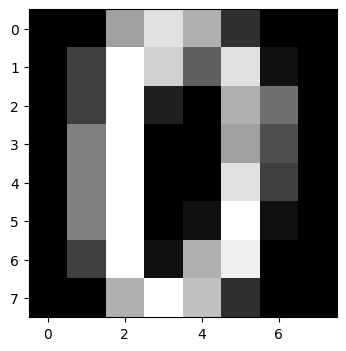

In [57]:
# Extract the data -> It will be your X_digits
X = data.data

# Extract the target -> It will be your y_digits
y = data.target

# Extract the images -> This are digits image for visualization
images = data.images


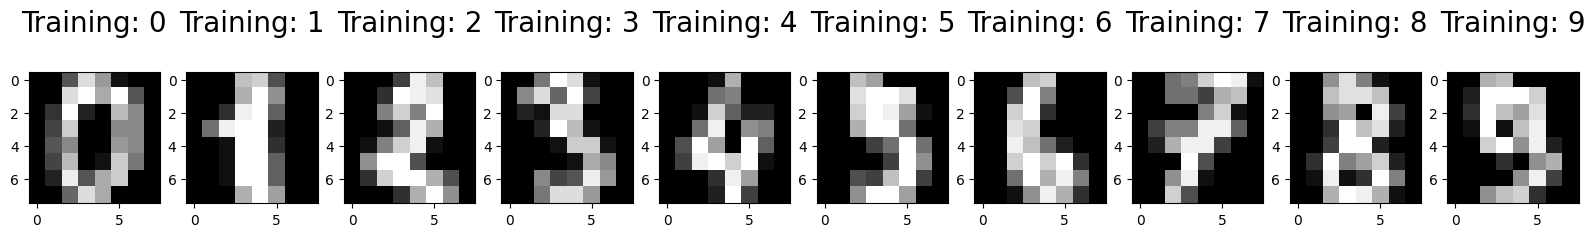

In [32]:
# Display images of the digits along with their labels
plt.figure(figsize=(20, 4))
# Plot the first 10 digits
for index, (image, label) in enumerate(zip(images[:10], y[:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(f'Training: {label}\n', fontsize=20)


    
# Hint: Use plt.subplot, plt.imshow, plt.title, and plt.show
plt.show()


In [35]:
## Create a DataFrame with the data and feature names to view data
df = pd.DataFrame(X, columns=data.feature_names)
# Add a target column to the DataFrame to include the target labels
df['Target']    = y

# Display the first few rows of the DataFrame
print(df.head())


   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0

In [92]:
# Split the dataset into training and testing sets -> test_size = 0.2 and random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building and Training your Model

### Model for Breast Cancer Dataset

In [93]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the random forest classifer
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

### Model for Digits Dataset

In [95]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifiers
rf_classifier.fit(X_train, y_train) 

# Make predictions
y_pred = rf_classifier.predict(X_test)


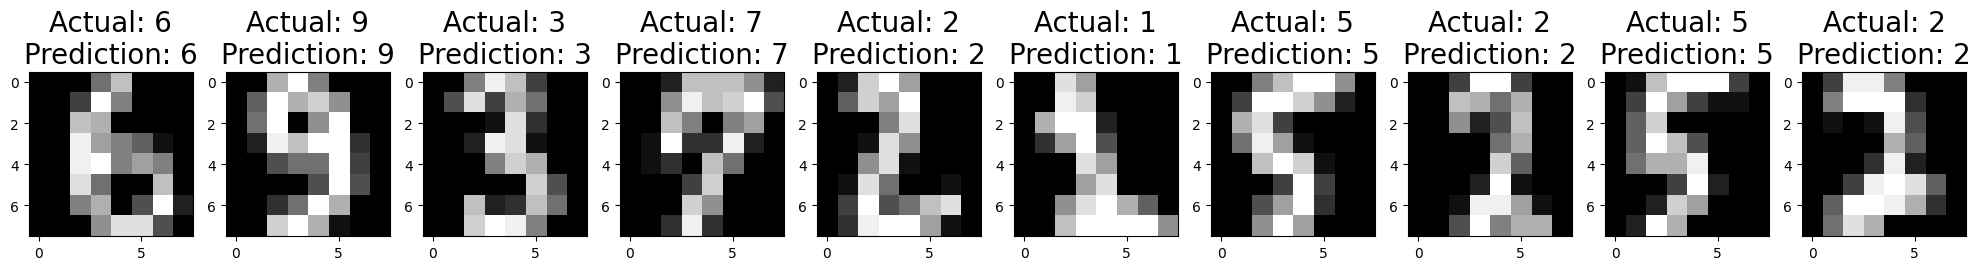

In [119]:
# Display images of the digits along with their predicted and actual labels
plt.figure(figsize=(25, 5))
# Plot the first 10 digits

for index, (image, label, prediction) in enumerate(zip(X_test[:10], y_test[:10], y_pred[:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray)

    plt.title(f'Actual: {label}\nPrediction: {prediction}', fontsize=20)
plt.show()

## Validation Metrics

### Validation Metrics for Breast Cancer Dataset

In [15]:
# Calculate validation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision_recall_auc = average_precision_score(y_test, y_pred)

In [16]:
# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Precision-Recall AUC: {precision_recall_auc:.2f}")


Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-Score: 0.97
ROC-AUC: 0.96
Precision-Recall AUC: 0.95


### Validation Metrics for Digits Dataset

In [117]:
# Calculate validation metrics
# hint -> For multi-class classification we have to specify the average argument to the weighted
# Calculate validation metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='weighted')
precision_recall_auc = average_precision_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average="weighted")


# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Precision-Recall AUC: {precision_recall_auc:.2f}")



Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
ROC-AUC: 0.98
Precision-Recall AUC: 0.95


### ROC Curve for Breast Cancer Dataset

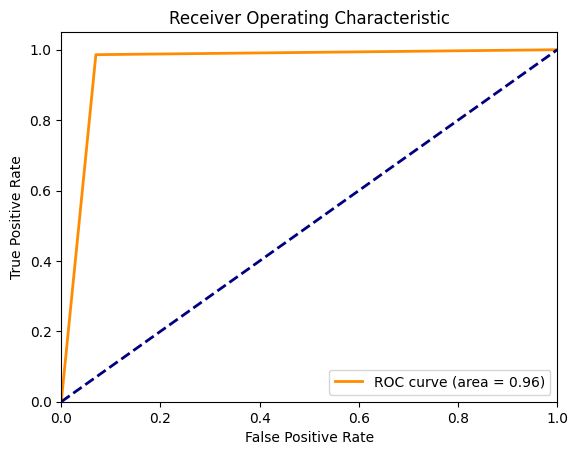

In [17]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### ROC Curve for Digits Dataset


In [121]:
# Plot ROC curve for digit 3
print((y_test[2], y_pred[2]))

# Plot ROC curve
# fpr, tpr, _ = roc_curve(y_test[2], y_pred[2])
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc='lower right')
# plt.show()

(3, 3)


### Optional

In [22]:
# Plot ROC curve for digit for all digits

